In [25]:
import torch
import torch.optim as optim

from sklearn.model_selection import train_test_split

import keras
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Набір даних

In [26]:
def PrepareData():
    data = datasets.make_regression()
    df = pd.DataFrame(data[0], columns=[f"feature_{i+1}" for i in range(data[0].shape[1])])
    df["target"] = data[1]
    
    x=df.iloc[: , :-1]
    y=df.iloc[: , -1]
    
    return df, x, y

# Keras

In [27]:
df, x , y = PrepareData()

In [28]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,target
0,0.458309,-1.414563,-0.119349,0.985096,-0.229066,2.038558,0.660387,-0.246422,-0.134572,0.053132,...,1.306065,-0.121804,-0.650649,-0.674952,-0.945565,-1.526177,1.322471,0.263927,0.138195,-146.752976
1,0.184568,0.051398,0.297456,-0.696543,0.429655,1.177929,-1.245496,0.561334,-1.068472,1.142458,...,0.865929,0.735658,-1.406908,-0.667031,-0.980006,0.960386,-0.385922,0.348125,-1.134025,-251.696141
2,-2.212705,-1.650461,-0.656921,0.341239,1.254488,-1.003174,-0.737841,-0.519014,0.415315,0.276040,...,0.020196,-0.442832,1.760474,-0.310738,0.444769,1.067164,-0.808231,0.633832,0.432363,421.583120
3,0.238575,0.839977,0.482139,0.408026,0.013249,-1.681527,-1.164910,-0.033822,-0.220416,-0.020076,...,-1.160685,2.046046,0.159493,-0.026297,-0.323021,-1.024351,0.959392,-0.765704,0.474683,-8.291261
4,1.008220,-0.423903,1.327341,1.185998,1.317878,-1.666737,-0.910308,-0.227997,-0.309544,-0.876813,...,0.740073,-0.801801,-1.252117,1.757459,0.079407,-1.127582,0.369045,2.341907,-0.828913,88.625874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.713689,1.058993,0.624049,1.614539,-2.224568,0.154761,0.192608,-2.644213,0.758390,1.037912,...,-0.208973,-0.498010,-1.312505,0.112872,0.734496,-0.574533,1.732499,1.278275,-0.255335,-51.167648
96,0.515322,-0.936743,0.900485,0.442852,-1.769131,-0.032845,-0.661873,-0.168311,0.604524,0.369986,...,1.421815,0.907686,-2.182003,-1.628828,1.202632,-0.994949,-0.448098,0.245865,1.207567,-232.356306
97,-0.267101,1.632658,0.403116,0.406072,-1.217460,-2.257879,1.021372,0.133101,-0.927658,-0.601537,...,0.490868,-0.334489,-0.106549,-0.570443,-0.736798,-0.714398,-0.035845,-0.986388,-0.565732,51.896355
98,-0.433523,0.358092,0.738480,-0.126734,1.044739,-0.102726,0.616420,1.723388,0.371396,-1.719797,...,-1.721579,-1.267375,-0.573148,0.617204,-0.032316,-2.695158,1.708088,-0.184432,1.346812,-207.799016


In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [30]:
model = keras.Sequential([
    keras.layers.Input(x.shape[1]),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1)
])

In [31]:
model.compile(loss='mean_squared_error', optimizer='adam')

Train on 80 samples, validate on 20 samples
Epoch 1/1000


80/80 [==============================] - 0s 2ms/sample - loss: 22276.0393 - val_loss: 16782.7148
Epoch 2/1000
80/80 [==============================] - 0s 28us/sample - loss: 22270.6062 - val_loss: 16781.3516
Epoch 3/1000
80/80 [==============================] - 0s 23us/sample - loss: 22265.1462 - val_loss: 16780.0625
Epoch 4/1000
80/80 [==============================] - 0s 23us/sample - loss: 22260.4893 - val_loss: 16778.8496
Epoch 5/1000
80/80 [==============================] - 0s 21us/sample - loss: 22256.8811 - val_loss: 16777.5410
Epoch 6/1000
80/80 [==============================] - 0s 24us/sample - loss: 22252.3135 - val_loss: 16776.3477
Epoch 7/1000
80/80 [==============================] - 0s 105us/sample - loss: 22248.4043 - val_loss: 16775.2227
Epoch 8/1000
80/80 [==============================] - 0s 170us/sample - loss: 22244.1086 - val_loss: 16773.9121
Epoch 9/1000
80/80 [==============================] - 0s 25us/sample - loss: 22241.2122 - val_loss: 16772.3926
Epoch 10/1000

2024-01-31 09:50:46.453053: W tensorflow/c/c_api.cc:305] Operation '{name:'training/Adam/dense_3/bias/v/Assign' id:294 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_3/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_3/bias/v, training/Adam/dense_3/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2024-01-31 09:50:46.518802: W tensorflow/c/c_api.cc:305] Operation '{name:'training_2/Adam/dense_5/kernel/v/Assign' id:888 op device:{requested: '', assigned: ''} def:{{{node training_2/Adam/dense_5/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_2/Adam/dense_5/kernel/v, training_2/Adam/dense_5/kernel/v/Initializer/zeros)}}' wa

80/80 [==============================] - 0s 266us/sample - loss: 22209.5454 - val_loss: 16757.3145
Epoch 19/1000
80/80 [==============================] - 0s 43us/sample - loss: 22205.7847 - val_loss: 16755.3457
Epoch 20/1000
80/80 [==============================] - 0s 40us/sample - loss: 22200.9771 - val_loss: 16753.4004
Epoch 21/1000
80/80 [==============================] - 0s 57us/sample - loss: 22196.1252 - val_loss: 16751.4531
Epoch 22/1000
80/80 [==============================] - 0s 27us/sample - loss: 22192.0535 - val_loss: 16749.2695
Epoch 23/1000
80/80 [==============================] - 0s 22us/sample - loss: 22187.0583 - val_loss: 16747.0195
Epoch 24/1000
80/80 [==============================] - 0s 24us/sample - loss: 22182.0406 - val_loss: 16744.5410
Epoch 25/1000
80/80 [==============================] - 0s 21us/sample - loss: 22176.6780 - val_loss: 16741.5527
Epoch 26/1000
80/80 [==============================] - 0s 29us/sample - loss: 22171.2363 - val_loss: 16738.4727
Epoch

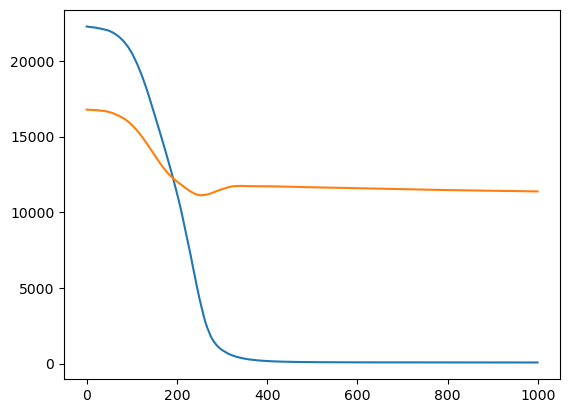

In [32]:
trainig = model.fit(x, y, epochs=1000, batch_size=50, validation_split=0.2)

plt.plot(trainig.epoch, trainig.history['loss'])
plt.plot(trainig.epoch, trainig.history['val_loss'])


# TensorFlow

In [33]:
df, x , y = PrepareData()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

X_train = torch.tensor(X_train.values, dtype = torch.float32)
X_test = torch.tensor(X_test.values, dtype = torch.float32)
y_train = torch.tensor(y_train.values, dtype = torch.float32)
y_test = torch.tensor(y_test.values, dtype = torch.float32)

In [35]:
X = tf.placeholder(tf.float32, shape=[None, 100])
Y = tf.placeholder(tf.float32, shape=y_train.shape)

W_1 = tf.Variable(tf.truncated_normal([100, 10], stddev=0.01))
b_1 = tf.Variable(tf.zeros([10]))
h_1 = tf.nn.relu(tf.matmul(X, W_1) + b_1)

W_2 = tf.Variable(tf.truncated_normal([10, 5], stddev=0.01))
b_2 = tf.Variable(tf.zeros([5]))
h_2 = tf.nn.relu(tf.matmul(h_1, W_2) + b_2)

W_3 = tf.Variable(tf.truncated_normal([5, 3], stddev=0.01))
b_3 = tf.Variable(tf.zeros([3]))
h_3 = tf.nn.relu(tf.matmul(h_2, W_3) + b_3)

W_out = tf.Variable(tf.truncated_normal([3, 1], stddev=0.01))
b_out = tf.Variable(tf.zeros([1]))
y_pred = tf.identity(tf.add(tf.matmul(h_3, W_out), b_out))

In [36]:
cost = tf.reduce_mean(tf.square(Y - y_pred))
minimization_op = tf.train.AdamOptimizer(learning_rate=0.01)
train = minimization_op.minimize(cost)

In [37]:

feed_dict = {
    X: X_train,
    Y: y_train
}

In [38]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(1000):
            c = sess.run(cost, feed_dict)

    if epoch % 10 == 0:
        print("Epoch:", epoch, " Loss:", c," Accuracy:")
    
    sess.run(train, feed_dict)
    predictions = sess.run([y_pred], feed_dict={X:X_test})

In [39]:
predictions

[array([[0.01033178],
        [0.0103295 ],
        [0.01033315],
        [0.01032928],
        [0.0103367 ],
        [0.01033142],
        [0.01032929],
        [0.01033213],
        [0.0103284 ],
        [0.01033587]], dtype=float32)]

In [40]:
y_test

tensor([ 202.7988,    4.6349,  -19.4410,  100.4042,  504.5619, -101.1191,
          79.4449,  119.4657,   22.0333,  -90.5688])

# PyTorch

In [41]:
df, x, y = PrepareData()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

X_train = torch.tensor(X_train.values, dtype = torch.float32)
X_test = torch.tensor(X_test.values, dtype = torch.float32)
y_train = torch.tensor(y_train.values, dtype = torch.float32)
y_test = torch.tensor(y_test.values, dtype = torch.float32)

In [43]:
class linearRegression(torch.nn.Module): 
    def __init__(self,input_dim):
        super(linearRegression, self).__init__()
        self.fc1 = torch.nn.Linear(input_dim, 10)
        self.fc2 = torch.nn.Linear(10, 5)
        self.fc3 = torch.nn.Linear(5, 3)
        self.fc4 = torch.nn.Linear(3, 1)

    def forward(self,d):
        out = torch.torch.relu(self.fc1(d))
        out = torch.torch.relu(self.fc2(out)) 
        out = torch.torch.relu(self.fc3(out))
        out = self.fc4(out)
        return out      

In [44]:
input_dim = X_train.shape[1]
torch.manual_seed(42)
model = linearRegression(input_dim)

In [45]:

loss = torch.nn.MSELoss()
optimizers = optim.Adam(params = model.parameters(),lr = 0.01)

In [46]:
num_of_epochs = 1000
for i in range(num_of_epochs):
  y_train_prediction=model(X_train)
  loss_value = loss(y_train_prediction.squeeze(), y_train)
  optimizers.zero_grad()
  loss_value.backward()
  optimizers.step()

  if i % 10 == 0:
    print(f'[epoch:{i}]: The loss value for training part={loss_value}')

[epoch:0]: The loss value for training part=48599.5390625
[epoch:10]: The loss value for training part=48593.68359375
[epoch:20]: The loss value for training part=48543.97265625
[epoch:30]: The loss value for training part=48269.140625
[epoch:40]: The loss value for training part=47245.984375
[epoch:50]: The loss value for training part=44436.296875
[epoch:60]: The loss value for training part=38946.25
[epoch:70]: The loss value for training part=33257.859375
[epoch:80]: The loss value for training part=31540.09765625
[epoch:90]: The loss value for training part=30087.1796875
[epoch:100]: The loss value for training part=29298.896484375
[epoch:110]: The loss value for training part=28817.5390625
[epoch:120]: The loss value for training part=28487.705078125
[epoch:130]: The loss value for training part=28282.689453125
[epoch:140]: The loss value for training part=28168.34375
[epoch:150]: The loss value for training part=28111.376953125
[epoch:160]: The loss value for training part=28080

[epoch:660]: The loss value for training part=27075.09765625
[epoch:670]: The loss value for training part=27056.541015625
[epoch:680]: The loss value for training part=27038.01953125
[epoch:690]: The loss value for training part=27019.521484375
[epoch:700]: The loss value for training part=27001.060546875
[epoch:710]: The loss value for training part=26982.626953125
[epoch:720]: The loss value for training part=26964.22265625
[epoch:730]: The loss value for training part=26945.84375
[epoch:740]: The loss value for training part=26927.494140625
[epoch:750]: The loss value for training part=26909.17578125
[epoch:760]: The loss value for training part=26890.876953125
[epoch:770]: The loss value for training part=26872.607421875
[epoch:780]: The loss value for training part=26854.3671875
[epoch:790]: The loss value for training part=26836.146484375
[epoch:800]: The loss value for training part=26817.9609375
[epoch:810]: The loss value for training part=26799.7890625
[epoch:820]: The loss 

In [47]:
with torch.no_grad():
   model.eval()
   y_test_prediction = model(X_test[0])
   test_loss = loss(y_test_prediction.squeeze(), y_test)
   print(f'Test loss value : {test_loss.item():.4f}')

Test loss value : 74329.9531


/Users/mykola/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
